In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression


In [5]:
df=pd.read_csv("gold_price.csv",parse_dates=True,index_col='Date')
df

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481
...,...,...,...,...,...,...
2019-08-27,1531.85,1532.95,1250.910,1247.510,1378.970,1380.880
2019-08-28,1541.75,1537.15,1263.310,1258.770,1389.890,1387.430
2019-08-29,1536.65,1540.20,1260.510,1262.960,1387.290,1392.030


In [13]:
df['Return']=df['USD (PM)'].pct_change()*100
df['Lagged_Return']=df.Return.shift()
df=df.dropna()
train=df['2001':'2018']
test=df['2019']

# Create train and test sets for dependent and independent variables
X_train=train['Lagged_Return'].to_frame()
Y_train=train['Return']
X_test=test['Lagged_Return'].to_frame()
Y_test=test['Return']

Using Linear Regression Model

In [14]:
model=LinearRegression()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)

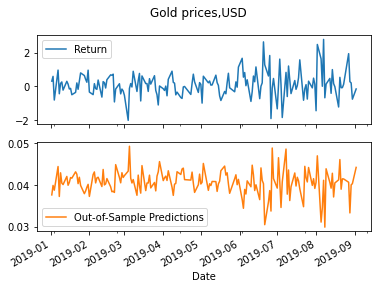

In [15]:
out_of_sample_results=Y_test.to_frame()
out_of_sample_results['Out-of-Sample Predictions']=model.predict(X_test)
out_of_sample_results.plot(subplots=True,title="Gold prices,USD")
plt.show()